# What is the probability that the first card drawn is either a shuffle card or a see the future card? Assume the deck has been properly shuffled and no other cards have been dealt.

I plan to conduct an prospective, observational study. The sample space is a standard deck of cards in a Exploding Kitten game that contains 56 cards. One trial in this simulation would be drawing a random card from the top of the deck, and the measured outcome would be the card drawn.

In [1]:
import random as rd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("CardDistribution.csv")

In [7]:
total = df["Number"].sum()
countS = df.loc[df["Card"] == "Skip", "Number"].values[0]
countN = df.loc[df["Card"] == "Nope", "Number"].values[0]
sProb = countS / total
nProb = countN / total
tProb = sProb + nProb
print("The theoretical probability of drawing a shuffle card or a see the future card is:", tProb)

The theoretical probability of drawing a shuffle card or a see the future card is: 0.1607142857142857


In [20]:
# Expand the deck based on counts
deck = []
numTrials = 100
for _, row in df.iterrows():
    deck.extend([row["Card"]] * row["Number"])

# Run 100 trials (draw with replacement)
trials = [rd.choice(deck) for _ in range(numTrials)]

# Count frequency of each card
trial_counts = Counter(trials)
# Display results
print("Card draw frequencies after 100 trials:")
for card, freq in trial_counts.items():
    print(f"{card}: {freq}")

frequency1 = trial_counts["Shuffle"]
frequencyH = int(frequency1)
hProb = frequencyH / numTrials
frequency2 = trial_counts["See The Future"]
frequencyS = int(frequency1)
sProb = frequencyH / numTrials
eProb = sProb + hProb
print("Empirical Probability of drawing a shuffle card or a see the future card: ", eProb)

Card draw frequencies after 100 trials:
Defuse: 9
See The Future: 5
Favor: 6
Skip: 8
Attack: 16
Cattermelon: 8
Nope: 11
Rainbow-Ralping Cat: 4
Exploding Kittens: 6
Shuffle: 4
Beard Cat: 8
Hairy Potato Cat: 11
Tacocat: 4
Empirical Probability of drawing a shuffle card or a see the future card:  0.08


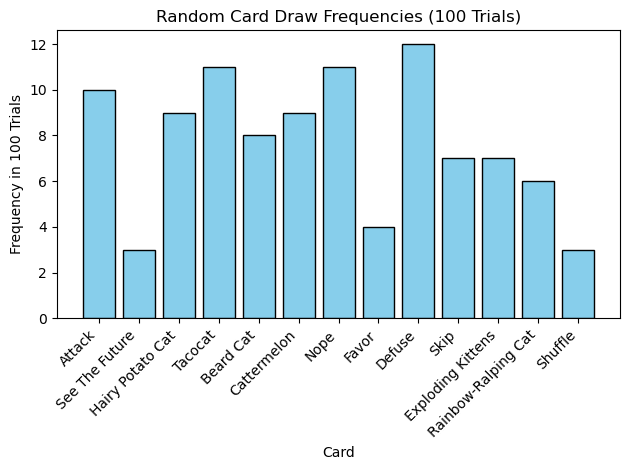

In [19]:
plt.bar(trial_counts.keys(), trial_counts.values(), color='skyblue', edgecolor='black')

# Rotate labels and align them
plt.xticks(rotation=45, ha='right')  # 'right', 'left', or 'center'

plt.xlabel("Card")
plt.ylabel("Frequency in 100 Trials")
plt.title("Random Card Draw Frequencies (100 Trials)")
plt.tight_layout()  # Adjust spacing to prevent clipping
plt.show()